# Height vs Weight

Welcome to Core Workshop 4: Polynomial Regression's live code session

Today we are dealing with a csv toy dataset taken from Kaggle: [https://www.kaggle.com/sakshamjn/heightvsweight-for-linear-polynomial-regression](https://www.kaggle.com/sakshamjn/heightvsweight-for-linear-polynomial-regression), which records the **weight** and **height** of people (they are made up). The data is already cleaned.

---

#### In this session we are using this data to build a `linear regression` model, trying to predict the **height** by a given **weight**

# Explore + Split

Train data size: 56
Test data size: 15


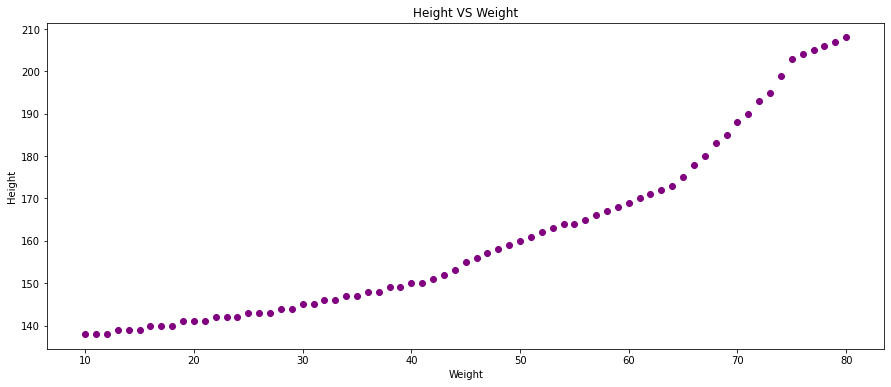

In [1]:
# Repeat previous processing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("./data/HeightVsWeight.csv")

x = df.iloc[:, :1]
y = df.iloc[:, 1:]

plt.figure(figsize=(15, 6))
plt.scatter(x, y, color="purple")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Height VS Weight")

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)
print("Train data size: {}".format(len(x_train)))
print("Test data size: {}".format(len(x_test)))

# Training

In [2]:
# This time, we will try using polynomial feature to build our model
from sklearn.preprocessing import PolynomialFeatures

poly_feat = PolynomialFeatures(degree=2)
x_train_poly = poly_feat.fit_transform(x_train)

# We can have look how the x variable is extended to degree 2, in the form [1, x^1, x^2]
x_train_poly[:5]


array([[1.000e+00, 6.700e+01, 4.489e+03],
       [1.000e+00, 7.300e+01, 5.329e+03],
       [1.000e+00, 6.200e+01, 3.844e+03],
       [1.000e+00, 6.500e+01, 4.225e+03],
       [1.000e+00, 5.700e+01, 3.249e+03]])

In [3]:
# Fitting the data, which means training the model to find optimal coeficients to define the polynomial equation

from sklearn.linear_model import LinearRegression
import random
import numpy as np

model = LinearRegression()
model.fit(x_train_poly, y_train)

print("Model training completed")
rand = np.array([[random.randint(10, 80)]])
rand_poly = poly_feat.fit_transform(rand)
print("Trying to predict a person with a weight of {} kg will have a height of {} cm".format(rand[0][0], round(model.predict(rand_poly)[0][0], 2)))


Model training completed
Trying to predict a person with a weight of 75 kg will have a height of 197.39 cm


Text(0.5, 1.0, 'Height VS Weight')

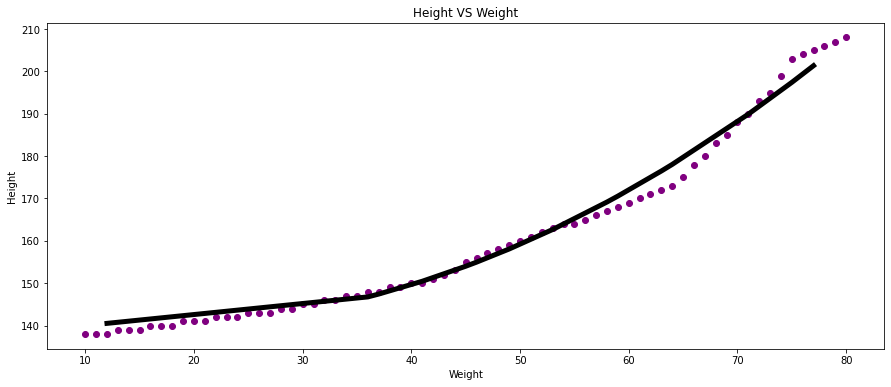

In [4]:
# How does it look like?
x_test = x_test.sort_values("Weight")
y_test = y_test.reindex(x_test.index)
x_test_poly = poly_feat.fit_transform(x_test)

plt.figure(figsize=(15, 6))
plt.scatter(x, y, color="purple")
plt.plot(x_test, model.predict(x_test_poly), color="black", linewidth=5)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Height VS Weight")

Text(0.5, 1.0, 'Height VS Weight')

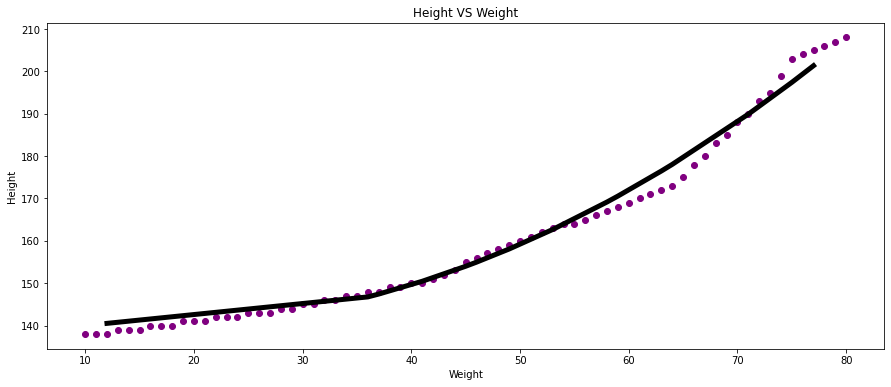

In [5]:
# If we want a quicker polynomial transformation, we can just use pipeline, which is a collection of processing that is run each time we call it. Then we don't have to build the polynomial feature manually each time we need it
# To show the result is the same

from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
pipeline.fit(x_train, y_train)

plt.figure(figsize=(15, 6))
plt.scatter(x, y, color="purple")
plt.plot(x_test, pipeline.predict(x_test), color="black", linewidth=5)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Height VS Weight")

# Score

In [6]:
accuracy_score = pipeline.score(x_test, y_test)
print("Model Accuracy: {}".format(round(accuracy_score, 4)))

Model Accuracy: 0.9796


# Much better! The prediction is nearly correct for almost 98% of the time